### Loading the DataSet

In [1]:
# import necessary libraries
import os
import pandas as pd
import numpy as np

# load Data
data_path = os.path.join(os.getcwd(), "..", "data", "weatherAUS.csv")
df = pd.read_csv(data_path)
pd.options.display.max_columns = 100

# ensure data has been loaded
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Understand the Data (Scoping)

What is the goal/origin of the dataset:
* predicting tommorrows rain
* data is from historical weather data from the last 10 years
* 'RainTomorrow' == Yes if the rain >1mm

neccessary clarifications:
* What is the problem we are trying to solve?
* why is it important for our business to solve this problem (big picture)?
* Where will we use ML in the process?
* How has the problem been solved before?
* How will we use the results of the model?
* Which is the worst error our model can make?
* How will we measure the success of the model?


| Name                | Description                                                          | Measurement Unit | Data Type | Possible Values/Range                                 |
|---------------------|----------------------------------------------------------------------|------------|------------------|--------------------------------------------------------|
| Date          | The date of observation || date | as timestamp in the Format "YYYY-mm-dd" |
| Location      | City ||String| |
| MinTemp       | The minimum temperature in degrees celsius || float ||
| MaxTemp       | The maximum temperature in degrees celsius || float ||
| Rainfall      | The amount of rainfall recorded for the day in mm|| float ||
| Evaporation   | The so-called Class A pan evaporation (mm) in the 24 hours to 9am|| float ||
| Sunshine      | The number of hours of bright sunshine in the day.|| float ||
| WindGustDir   | The direction of the strongest wind gust in the 24 hours to midnight || String | ['N', 'NE', 'NNE'] |
| WindGustSpeed | The speed (km/h) of the strongest wind gust in the 24 hours to midnight ||||
| WindDir9am    | The direction of the Wind ||||
| WindDir3pm    | The direction of the Wind ||||
| WindSpeed9am  | Wind speed (km/hr) averaged over 10 minutes prior to 9am ||||
| WindSpeed3pm  | Wind speed (km/hr) averaged over 10 minutes prior to 3pm ||||
| Humidity9am   | Humidity (percent) at 9am || float | %|
| Humidity3pm   | Humidity (percent) at 3pm || float | %|
| Pressure9am   | Atmospheric pressure (hpa) reduced to mean sea level at 9am||||
| Pressure3pm   | Atmospheric pressure (hpa) reduced to mean sea level at 3am||||
| Cloud9am      | Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.|| int | values between 1 to 9 |
| Cloud3pm      | raction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values || int | values between 1 to 9 |
| Temp9am       | Temperature (degrees C) at 9pm ||||
| Temp3pm       | Temperature (degrees C) at 3pm ||||
| RainToday     | Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0 || bool ||
| RainTomorrow  | The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".||||


In [2]:
# first overview of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [3]:
# arithmetic analysis
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [4]:
# prepare qualitative and quantitative columns
cat_cols = []
num_cols = []

for feature in df.columns:
    if df[feature].dtype!="object":
        num_cols.append(feature)
    else:
        cat_cols.append(feature)

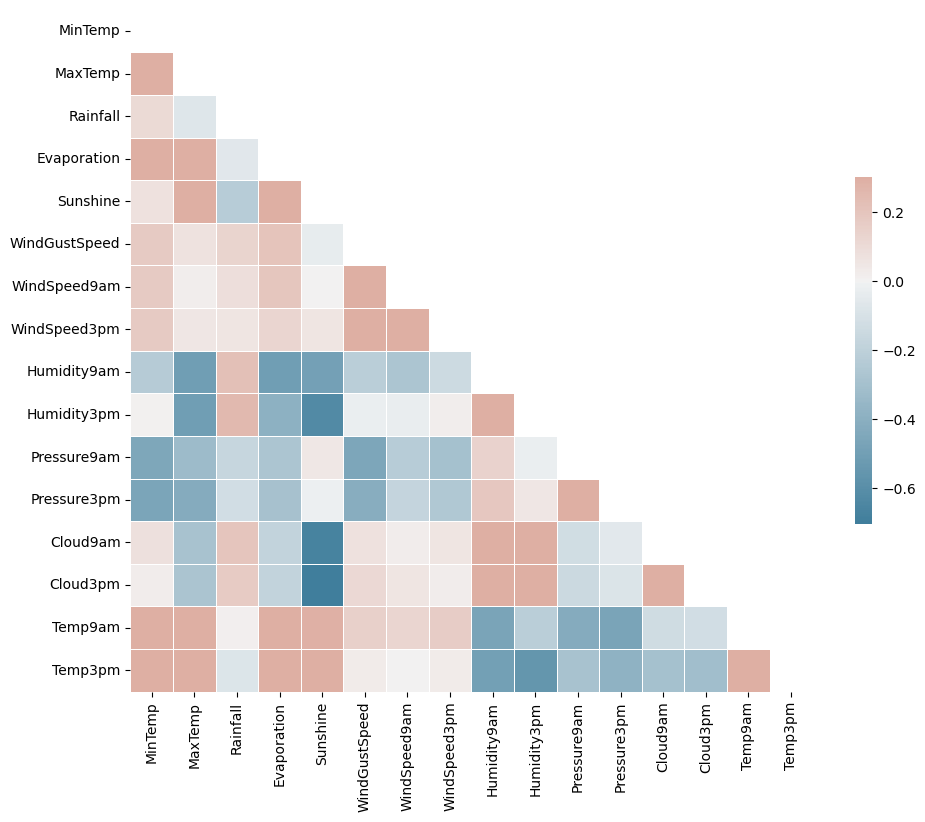

In [5]:
# importing necessary libraries for plots
import matplotlib.pyplot as plt
import seaborn as sns

# printing correlation map
# Correlation map cannot handle qualitaive data
corr = df[num_cols].corr()

# Compute the correlation matrix
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

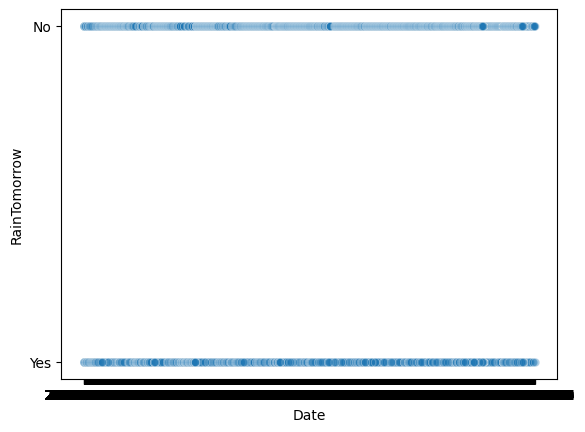

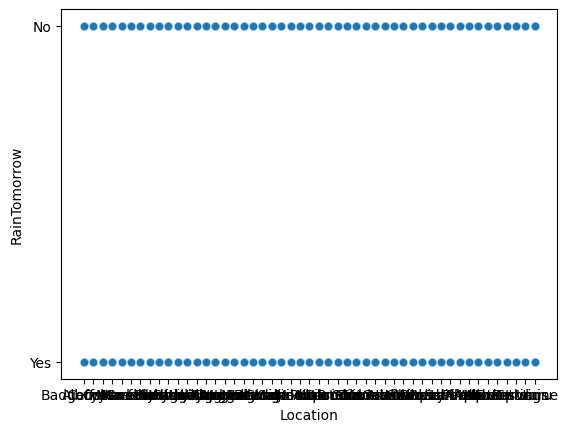

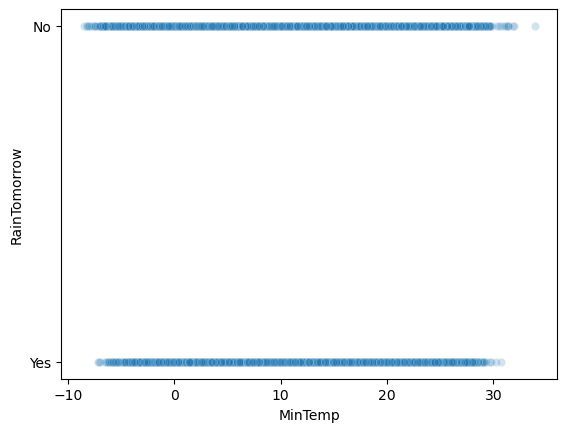

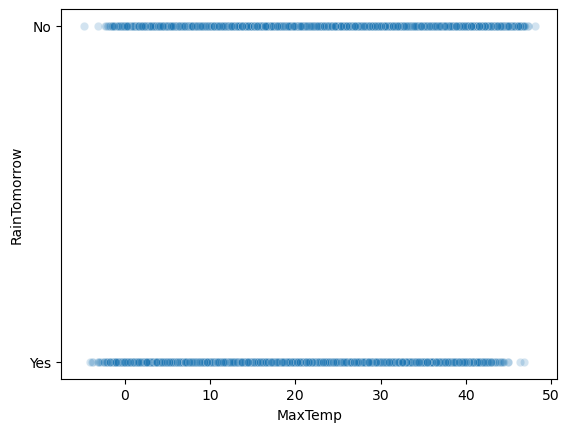

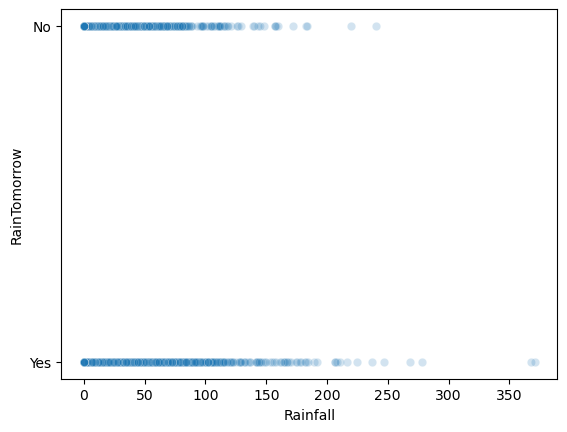

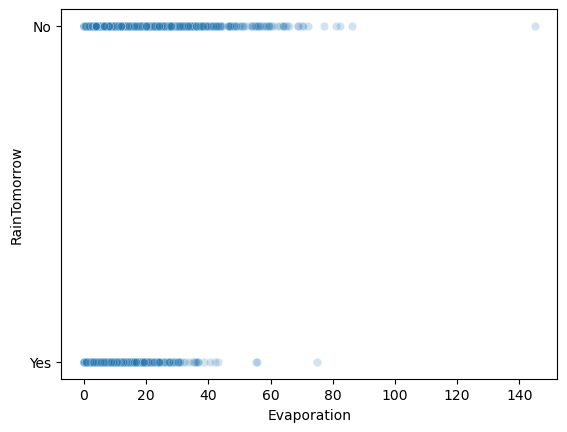

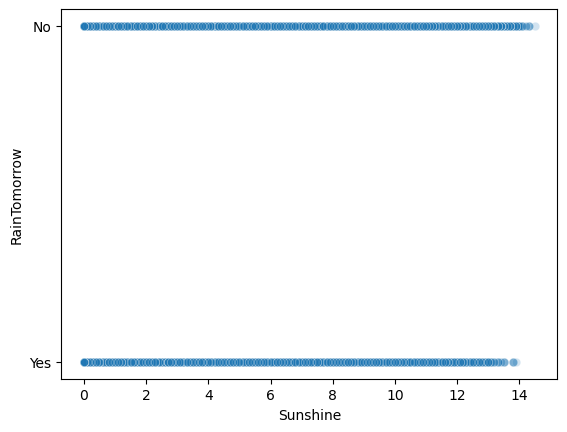

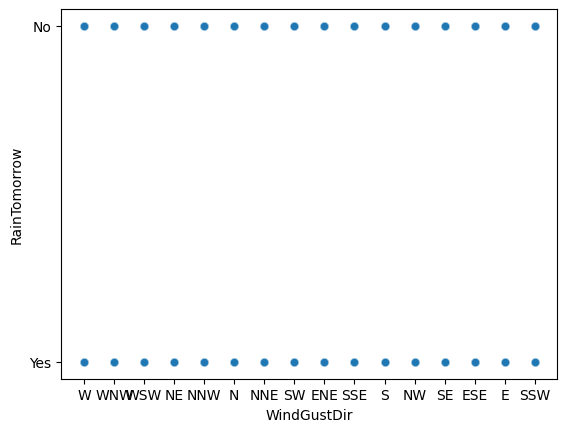

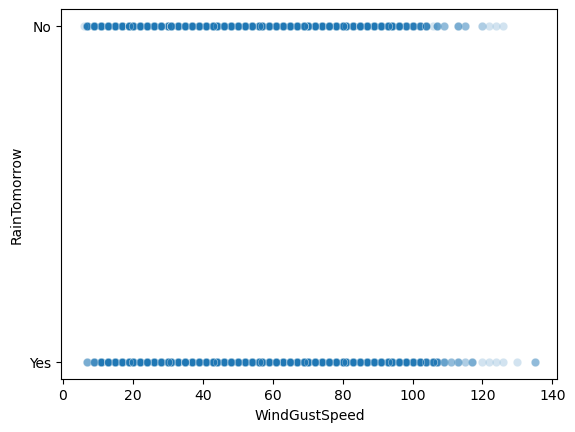

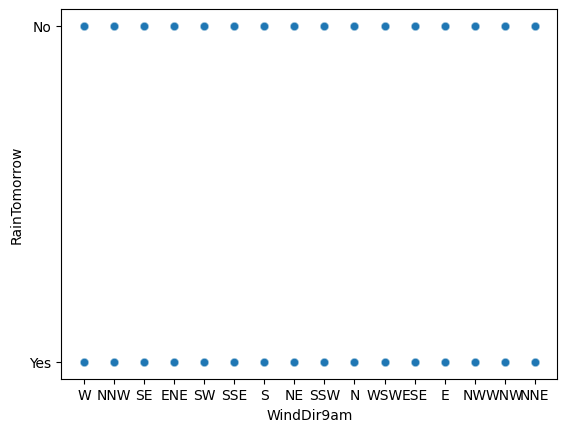

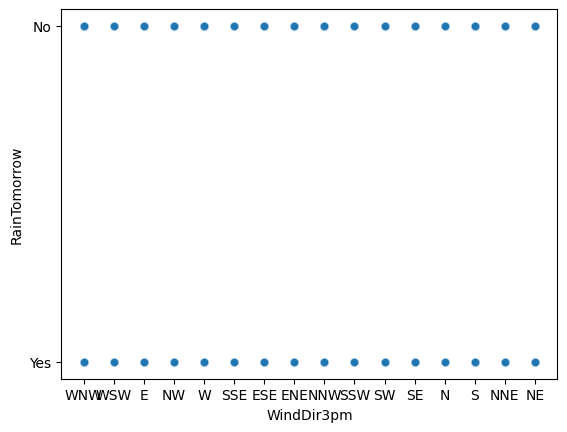

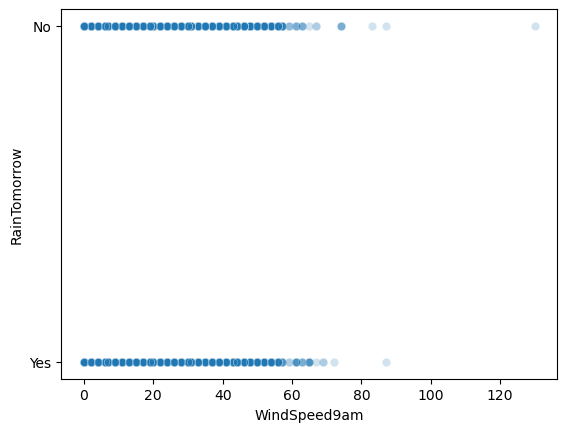

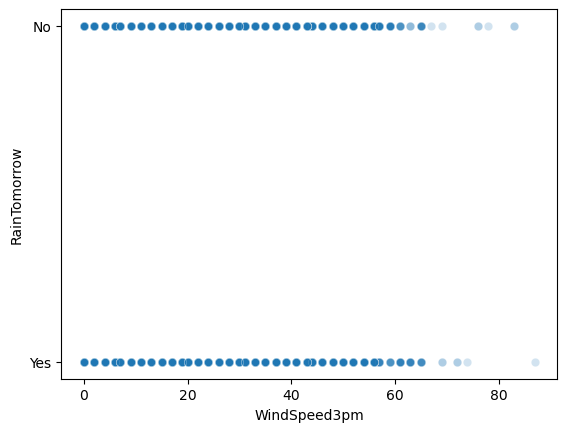

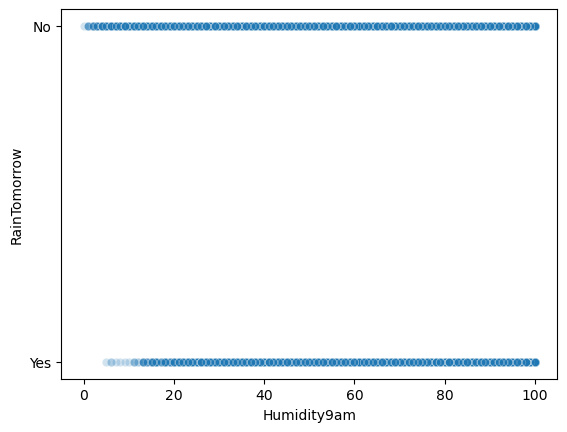

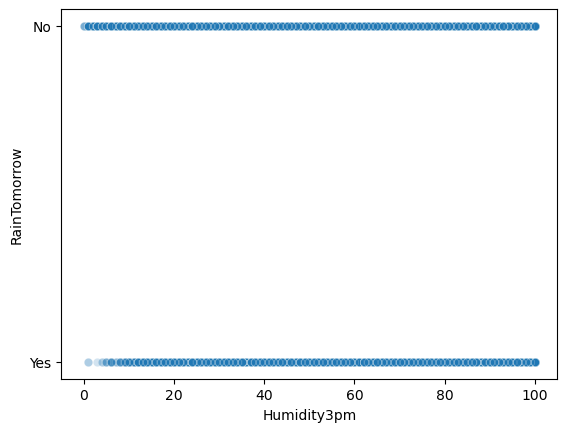

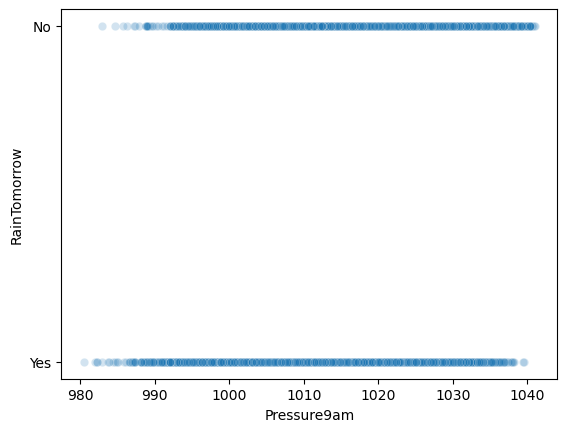

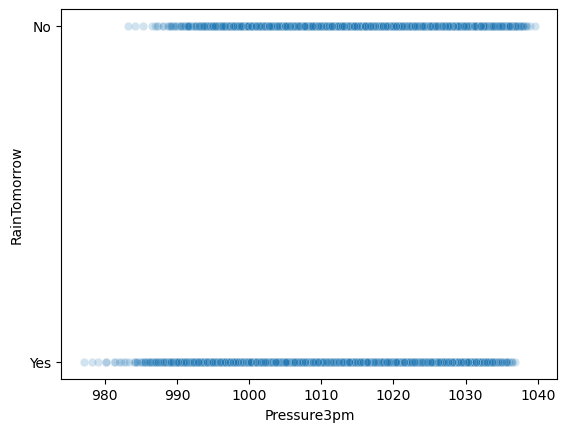

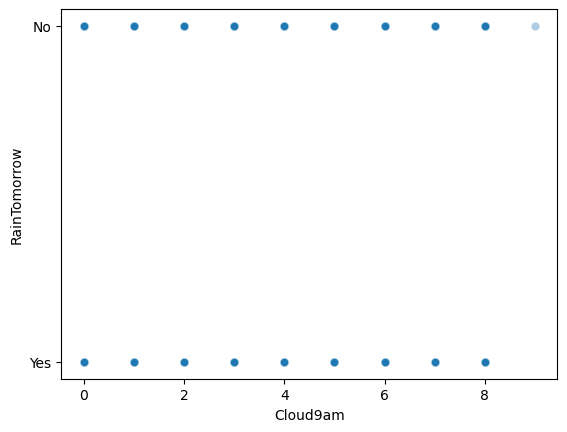

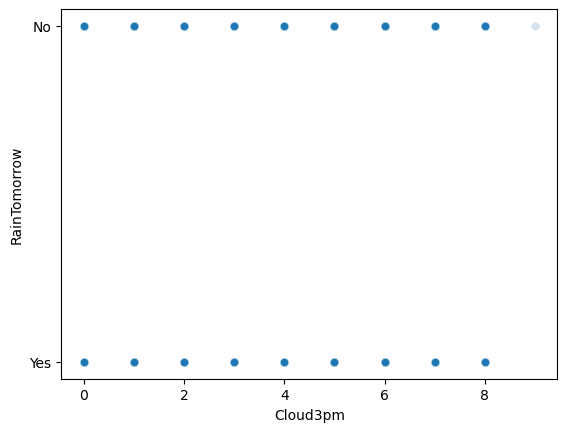

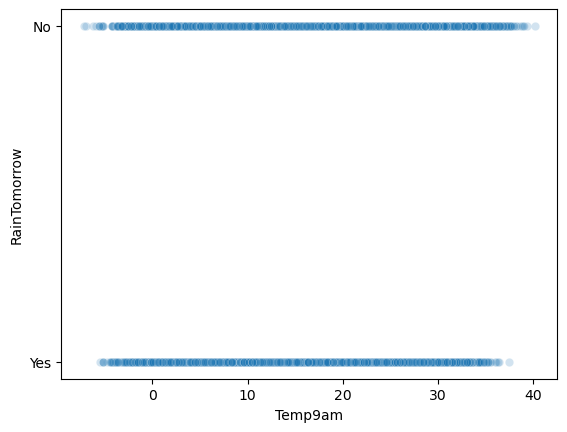

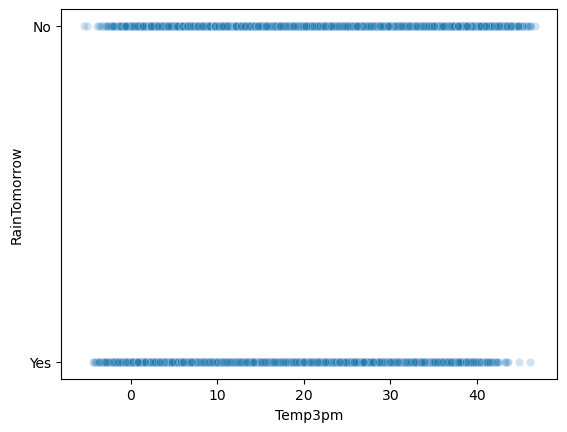

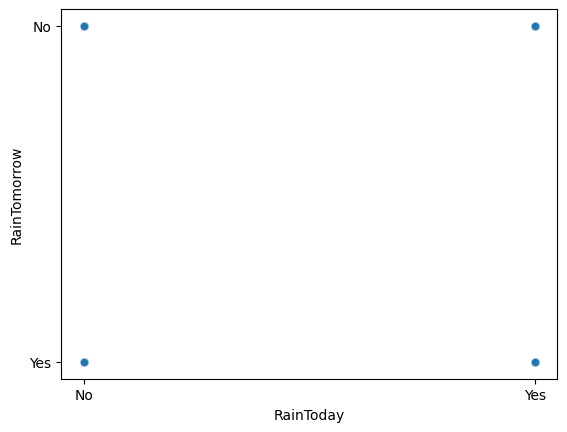

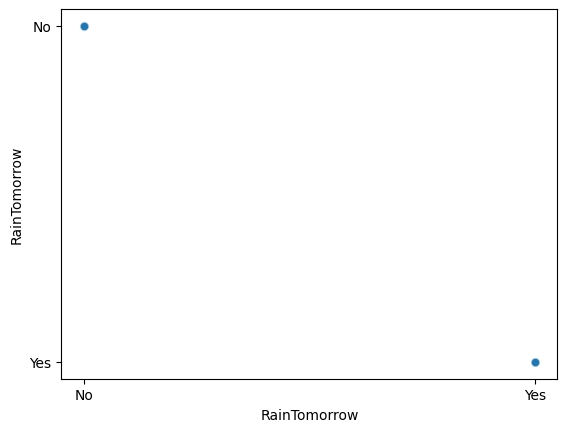

In [6]:
# create plots for each feature
for feature_name in df.columns:
    sns.scatterplot(df, x=feature_name, y="RainTomorrow", alpha=0.2)
    plt.show()

<b>Conclusion:</b>
- rainTomorrow => evaporation slightly higher
- rainTomorrow => humidity slightly higher
- rainTomorrow => pressure slightly lower (<985 HPasc)

### Modeling the Data

#### Data Transformation
What are the relevant qualitative columns that need to be transformed to quantitative data?
Possible columns: 
* Date
* Location
* WindGustDir
* WindDir9am/3pm
* RainToday
* RainTomorrow

In [7]:
# quantitative data
print(df[num_cols].head())

print("\n--------------------\n")

# qualitative data
print(df[cat_cols].head())

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          NaN       NaN           44.0   
1      7.4     25.1       0.0          NaN       NaN           44.0   
2     12.9     25.7       0.0          NaN       NaN           46.0   
3      9.2     28.0       0.0          NaN       NaN           24.0   
4     17.5     32.3       1.0          NaN       NaN           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0       1007.1       8.0       NaN     16.9     21.8  
1       1007.8       NaN      

In [8]:
# transform qualitative (nominale) data into quantitative data
from sklearn.preprocessing import OneHotEncoder
encoded_df = pd.DataFrame()

# other columns
encoder = OneHotEncoder(drop='first', sparse_output=False) 
encoded_cols = encoder.fit_transform(df[cat_cols].drop(['Location','Date','WindGustDir','WindDir9am','WindDir3pm'],axis=1))

encoded_df = pd.concat([
    pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(), index=df.index),
    encoded_df])

# WindGustDir WindDir9am WindDir3pm => Fraction of 360° 
degrees_map={'N':0, 'NNE':22.5,"NE":45,"ENE":67.5, 'E':90,'ESE':112.5, 'SE':135,'SSE':157.5, 'S':180,'SSW':202.5, 'SW':225,'WSW':247.5, 'W':270,'WNW':292.5,'NW':315,'NNW':337.5}
col_names = ['WindGustDir','WindDir9am','WindDir3pm']
for col_name in col_names:
    encoded_df[col_name + '_encoded'] = df[col_name].map(degrees_map)
    
# location as FrequencyEnc
freq_map = df['Location'].value_counts()
encoded_df['Location_encoded'] = df['Location'].map(freq_map)


# date???
#@TODO

encoded_df.head(10)

,RainToday_Yes,RainToday_nan,RainTomorrow_Yes,RainTomorrow_nan,WindGustDir_encoded,WindDir9am_encoded,WindDir3pm_encoded,Location_encoded
0,0.0,0.0,0.0,0.0,270.0,270.0,292.5,3040
1,0.0,0.0,0.0,0.0,292.5,337.5,247.5,3040
2,0.0,0.0,0.0,0.0,247.5,270.0,247.5,3040
3,0.0,0.0,0.0,0.0,45.0,135.0,90.0,3040
4,0.0,0.0,0.0,0.0,270.0,67.5,315.0,3040
5,0.0,0.0,0.0,0.0,292.5,270.0,270.0,3040
6,0.0,0.0,0.0,0.0,270.0,225.0,270.0,3040
7,0.0,0.0,0.0,0.0,270.0,157.5,270.0,3040
8,0.0,0.0,1.0,0.0,337.5,135.0,315.0,3040
9,1.0,0.0,0.0,0.0,270.0,180.0,157.5,3040


In [9]:
#df.head()
df.loc[(df['Location'] != 'Albury')]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
3040,2009-01-01,BadgerysCreek,13.3,34.2,0.0,NaN,NaN,W,61.0,NNE,NaN,11.0,NaN,67.0,NaN,1005.6,NaN,NaN,NaN,21.0,NaN,No,No
3041,2009-01-02,BadgerysCreek,14.7,26.1,0.0,NaN,NaN,SE,46.0,SE,SE,7.0,24.0,59.0,54.0,1012.9,1013.5,NaN,NaN,20.7,22.2,No,No
3042,2009-01-03,BadgerysCreek,13.6,22.3,0.0,NaN,NaN,NNE,30.0,ESE,NE,6.0,15.0,57.0,51.0,1021.9,1019.2,NaN,NaN,17.9,21.7,No,No
3043,2009-01-04,BadgerysCreek,17.7,31.2,0.0,NaN,NaN,NE,39.0,NNE,N,9.0,15.0,62.0,43.0,1018.7,1013.6,NaN,NaN,22.0,30.6,No,No
3044,2009-01-05,BadgerysCreek,15.5,38.8,0.0,NaN,NaN,SW,50.0,NNE,W,7.0,17.0,67.0,19.0,1013.2,1007.6,NaN,NaN,22.7,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Hint regarding the above transformation:
- OHE should only be used where neccessary (https://www.geeksforgeeks.org/ml-one-hot-encoding/) - Alternative "Label ENcoding":
    - Target (Mean) Encoding =>
    - Binary Encoding => mean
    - Ordinal Encoding => Tshirt Sizes: M=1, L=2, etc.; low=1, middle=2, High=3
    - Frequency Encoding => replace category with frequency in the set
- "Location" + "Date" were excluded => is there any usage in transforming the 
- 

Ideen:
- Datum den quartalen zuordnen ("regen im herbst/winter wahrscheinlicher als Sommer...")
- Location der Himmelsrichtung zuordnen ("Regen in südlichen gebieten aufgrund der Luftmassenbewegung wahrscheinlicher...")
- Himmelsrichtung als Degrees?
- Bool als 0 und 1 als BinaryEncoding
- Location als FrequencyEncoding?
- Time as Fraction of year?

#### Handle NaN Values

Affected are all columns except Date and Location.
Affected Columns: MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow

columns where "NaN" could be ignored:

columns we should remove because of "NaN":
- RainToday => no median/mean possible
- RainTomorrow => no evaluation of prediction possible
- Rainfall => propable no mean possible - is not continous enough

columns we should alter because of "NaN":
- MinTemp, MaxTemp, Evaporation, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm => mean based upon last and next day
  (How continous is the data?)
- ?WindGustDir => median of WindDir9am and WindDir3pm
- ?WindGustSpeed => median of WindSpeed9am and WindSpeed3pm
- ?Sunshine


In [10]:
# get all lines with NaN values
#df.isnull().any()
#df[df.isnull().any(axis=1)]

In [11]:
# different views on RainTomorrow

# correlation with 'Pressure'


#sns.histplot(data=df, x="Pressure3pm", hue="RainTomorrow", multiple="dodge");
#sns.histplot(data=df, x="Pressure9am", hue="RainTomorrow", multiple="stack");
#sns.histplot(data=df, x="Pressure3pm", hue="RainTomorrow", multiple="stack");

In [12]:
# broad overview of mutual correlating columns
#sns.histplot(data=df, x="RainToday", hue="RainTomorrow", multiple="dodge")

In [13]:
# see the wind direction
#sns.histplot(data=df, x="WindSpeed9am", hue="RainTomorrow", multiple="stack")
#sns.histplot(data=df, x="WindSpeed3pm", hue="RainTomorrow", multiple="stack")

#### Scaling
@TODO: Necessary?

### Analyse
Abhängigkeiten scheinen folgende zu sein:
* Regen bedingt durch => Temp, Pressure, Sunshine
* Regen neg. bedingt durch => Cloud, Humidity

Questions to answer:
* gleich. Verteilung der Daten auf die Städte?

<Axes: xlabel='Location', ylabel='Count'>

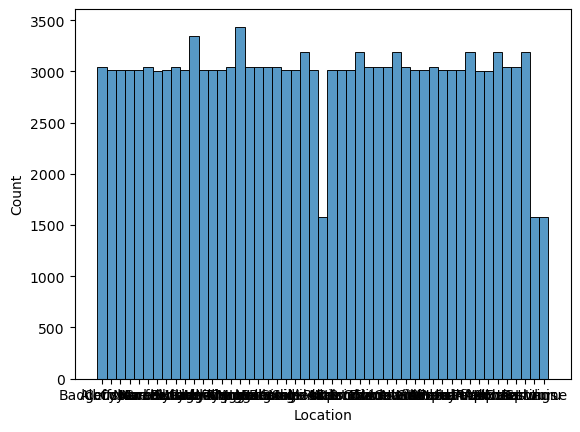

In [14]:
sns.histplot(data=df, x="Location")